[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train a YOLOv8 Oriented Bounding Boxes Model

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov8-obb-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

In this guide, we will walk through how to train a YOLOv8 oriented bounding box detection model.

If you notice that our notebook behaves incorrectly, let us know by [opening an issue on the Roboflow Notebooks repository](https://github.com/roboflow/notebooks/issues).

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading our [YOLOv8 oriented bounding box training blog post](https://blog.roboflow.com/train-yolov8-obb-model/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Checking that our Colab environment has a GPU
- Installing YOLOv8
- Preparing a dataset
- Training a YOLOv8 OBB model
- Running inference on our model

Without further ado, let's get started!

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Sep  9 05:09:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   69C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [3]:
!pip install ultralytics==8.2.103 -q

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Universe

Need data for your project? Check out Roboflow Universe, a repository of open source computer vision datasets. You can export any dataset labeled for instance segmentation as a YOLOv8 Oriented Bounding Boxes dataset for use in training a YOLOv8 Oriented Bounding Boxes model.

[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Prepare a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let us show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Choose "Object Detection" as your project type.

<img src="https://media.roboflow.com/obb-tutorial/create.png" alt="Object detection selected on the Roboflow Create Project pop up" height="300" />

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<img src="https://media.roboflow.com/obb-tutorial/upload.png" alt="Uploading images to Roboflow" height="300" />

### Step 3: Label Data

If you only have images, you can label them with oriented bounding boxes in [Roboflow Annotate](https://docs.roboflow.com/annotate).

**To label an oriented bounding box, use our polygon annotation tool.**

You can also take an existing segmentation dataset from your workspace or Roboflow Universe and export it as OBB.

<img src="https://media.roboflow.com/obb-tutorial/annotate.png" alt="Annotate an image" height="300" />

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<img src="https://media.roboflow.com/keypoint/version.png" alt="Generate a dataset version" height="300" />

### Step 5: Export dataset

Once the dataset version is generated, we can download it for use in training a model.

![Generate a dataset version](https://media.roboflow.com/keypoint/export.png)


In [6]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="duI2P016ViyIHtg9ER5z")
project = rf.workspace("violence-detection-rvh0k").project("stick-rod-detection")
version = project.version(4)
dataset = version.download("yolov11")


/content/datasets
  Using cached roboflow-1.2.7-py3-none-any.whl.metadata (9.7 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached roboflow-1.2.7-py3-none-any.whl (88 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Stick/rod-Detection-4 in yolov11:: 100%|██████████| 2006/2006 [00:00<00:00, 5622.08it/s]


In [7]:
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
data['train'] = '../train/images'
data['val'] = '../valid/images'
data['test'] = '../test/images'
if 'path' in data:
  del data['path']
with open(f'{dataset.location}/data.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)

## Train a YOLOv8 OBB Object Detection Model

With our dataset downloaded, we can now train a YOLOv8 OBB object detection model. Run the code snippet below to start training your model:

In [9]:
!wget https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-obb.pt

--2025-09-09 05:12:37--  https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-obb.pt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/fc516e1e-5067-46fa-9e4e-1510cbb4fc60?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-09T05%3A48%3A55Z&rscd=attachment%3B+filename%3Dyolov8x-obb.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-09T04%3A48%3A11Z&ske=2025-09-09T05%3A48%3A55Z&sks=b&skv=2018-11-09&sig=%2Bq4ttlWEjA4FfICC5tt0PGmGHJMHmXSsdr8whR8GnNU%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NzM5NTA1NywibmJmIjoxNzU3Mzk0NzU3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9

In [10]:
# Download YOLOv8x-OBB model weights
!wget https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-obb.pt -O yolov8x-obb.pt

--2025-09-09 05:13:34--  https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-obb.pt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/fc516e1e-5067-46fa-9e4e-1510cbb4fc60?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-09T05%3A48%3A55Z&rscd=attachment%3B+filename%3Dyolov8x-obb.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-09T04%3A48%3A11Z&ske=2025-09-09T05%3A48%3A55Z&sks=b&skv=2018-11-09&sig=%2Bq4ttlWEjA4FfICC5tt0PGmGHJMHmXSsdr8whR8GnNU%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NzM5NTA1NywibmJmIjoxNzU3Mzk0NzU3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9

In [13]:
!pip install --upgrade --force-reinstall numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 111.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.2.7 requires opencv-python-headless==4.10.0.84, which is not installed.
albucore 0.0.24 requires opencv-python-headless>=4.9.0.80, which is not installed.
albumentations 2.0.8 requires opencv-python-headless>=4.9.0.80, which is not installed.
ultralytics 8.2.103 requires numpy<2.0.0,>=1.23.0, but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have nump

In [15]:
# Re-align NumPy + Torch + Ultralytics
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall torch torchvision torchaudio
!pip install --upgrade --force-reinstall ultralytics


  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.2.7 requires opencv-python-headless==4.10.0.84, which is not installed.
albucore 0.0.24 requires opencv-python-headless>=4.9.0.80, which is not installed.
albumentations 2.0.8 requires opencv-python-headless>=4.9.0.80, which is not installed.
ultralytics 8.2.103 requires numpy<2.0.0,>=1.23.0, but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires

  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 722.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 812.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 133.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 743.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.6 MB/s eta 0:00:00
  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached ultralytics_thop-2.0.17-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.0 MB/s eta 0:00:00
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-

In [18]:
!pip install -U ultralytics

In [1]:
# Upgrade NumPy first
!pip install --upgrade --force-reinstall numpy

# Upgrade Torch stack to match
!pip install --upgrade --force-reinstall torch torchvision torchaudio

# Upgrade Ultralytics
!pip install --upgrade --force-reinstall ultralytics


  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.2.7 requires opencv-python-headless==4.10.0.84, which is not installed.
albucore 0.0.24 requires opencv-python-headless>=4.9.0.80, which is not installed.
albumentations 2.0.8 requires opencv-python-headless>=4.9.0.80, which is not installed.
roboflow 1.2.7 requires idna==3.7, but you have idna 3.10 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 re

  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (7.2 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu1

  Using cached ultralytics-8.3.196-py3-none-any.whl.metadata (37 kB)
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached psutil-7.0.0-cp36-abi3-manylinux_2_1

In [ ]:
New https://pypi.org/project/ultralytics/8.3.196 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

---------------------------------------------------------------------------

ValueError                                Traceback (most recent call last)

/tmp/ipython-input-467457201.py in <cell line: 0>()
      2
      3 model = YOLO('/content/datasets/yolov8x-obb.pt')
----> 4 results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640)

6 frames

/usr/local/lib/python3.12/dist-packages/numpy/random/_pickle.py in <module>
      1 from .bit_generator import BitGenerator
----> 2 from .mtrand import RandomState
      3 from ._philox import Philox
      4 from ._pcg64 import PCG64, PCG64DXSM
      5 from ._sfc64 import SFC64

numpy/random/mtrand.pyx in init numpy.random.mtrand()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject



In [15]:
from ultralytics import YOLO

model = YOLO('/content/datasets/yolov8x-obb.pt')

# ✅ wrap your path in quotes:
results = model.train(
    data="/content/datasets/Stick/rod-Detection-4/data.yaml",
    epochs=100,
    imgsz=320
)


Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Stick/rod-Detection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/datasets/yolov8x-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

In [16]:
# 1️⃣ Zip the folder (this will create train8.zip in /content)
!zip -r /content/train8.zip /content/runs/obb/train8


  adding: content/runs/obb/train8/ (stored 0%)
  adding: content/runs/obb/train8/train_batch2.jpg (deflated 2%)
  adding: content/runs/obb/train8/val_batch1_labels.jpg (deflated 11%)
  adding: content/runs/obb/train8/val_batch1_pred.jpg (deflated 11%)
  adding: content/runs/obb/train8/results.csv (deflated 61%)
  adding: content/runs/obb/train8/confusion_matrix.png (deflated 36%)
  adding: content/runs/obb/train8/results.png (deflated 8%)
  adding: content/runs/obb/train8/args.yaml (deflated 53%)
  adding: content/runs/obb/train8/confusion_matrix_normalized.png (deflated 35%)
  adding: content/runs/obb/train8/val_batch0_labels.jpg (deflated 13%)
  adding: content/runs/obb/train8/train_batch4232.jpg (deflated 6%)
  adding: content/runs/obb/train8/BoxR_curve.png (deflated 16%)
  adding: content/runs/obb/train8/BoxF1_curve.png (deflated 17%)
  adding: content/runs/obb/train8/BoxP_curve.png (deflated 18%)
  adding: content/runs/obb/train8/val_batch2_labels.jpg (deflated 11%)
  adding: cont

In [19]:
from ultralytics import YOLO

# 1️⃣ Load your trained model (best.pt)
model = YOLO('/content/runs/obb/train8/weights/best.pt')

# 2️⃣ Run OBB inference on the video
results = model.predict(
    source='/content/sssim.webm',   # input video
    task='obb',                     # explicitly tell YOLO it's OBB task
    save=True,                      # save output video
    save_txt=True,                  # optional: save txt annotations
    conf=0.25                       # confidence threshold, tweak if needed
)

# 3️⃣ The output video will be saved inside:
# /content/runs/obb/predict*/ (first predict run = predict, then predict2 etc.)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1658) /content/sssim.webm: 192x320 1 stick, 56.1ms
video 1/1 (frame 2/1658) /content/sssim.webm: 192x320 1 stick, 28.7ms
video 1/1 (frame 3/1658) /content/sssim.webm: 192x320 1 stick, 28.8ms
video 1/1 (frame 4/1658) /content/sssim.webm: 192x320 1 stick, 28.7ms
video 1/1 (frame 5/1658) /content/sssim.webm: 192x320 1 stick, 26.3ms
video 1/1 (frame 6/1658) /content/sssim.webm: 192x320 1 stick, 24.5ms
video 1/1 (frame 7/1658) /content/ss

In [17]:
!pip install yt-dlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.3 MB/s eta 0:00:00


In [18]:
!yt-dlp https://www.youtube.com/watch?v=BNw1fTpxmxY


[youtube] Extracting URL: https://www.youtube.com/watch?v=BNw1fTpxmxY
[youtube] BNw1fTpxmxY: Downloading webpage
[youtube] BNw1fTpxmxY: Downloading tv simply player API JSON
[youtube] BNw1fTpxmxY: Downloading tv client config
[youtube] BNw1fTpxmxY: Downloading player 6740c111-main
[youtube] BNw1fTpxmxY: Downloading tv player API JSON
[info] BNw1fTpxmxY: Downloading 1 format(s): 247+251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Silambam Nedukambu intermediate lesson ｜ Aakarsh ｜ Kalaripayattu ｜ Karrasamu ｜ Martial art [BNw1fTpxmxY].f247.webm
[download] 100% of    6.30MiB in 00:00:01 at 5.23MiB/s
[download] Destination: Silambam Nedukambu intermediate lesson ｜ Aakarsh ｜ Kalaripayattu ｜ Karrasamu ｜ Martial art [BNw1fTpxmxY].f251.webm
[download] 100% of  856.47KiB in 00:00:00 at 1.63MiB/s
[Merger] Merging formats into "Silambam Nedukambu intermediate lesson ｜ Aakarsh ｜ Kalaripayattu ｜ Karrasamu ｜ Martial art [BNw1fTpxmxY].webm"
Deleting original fil

In [13]:
import glob, os

# convert YOLO (xc,yc,w,h) to OBB with 4 corners (axis-aligned rectangle)
def yolo_to_obb(xc, yc, w, h):
    x1 = xc - w/2
    y1 = yc - h/2
    x2 = xc + w/2
    y2 = yc - h/2
    x3 = xc + w/2
    y3 = yc + h/2
    x4 = xc - w/2
    y4 = yc + h/2
    return x1,y1,x2,y2,x3,y3,x4,y4

label_paths = glob.glob('/content/datasets/Stick/rod-Detection-4/valid/labels/*.txt')
for label_path in label_paths:
    with open(label_path, 'r') as f:
        lines = f.read().strip().splitlines()

    new_lines = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:  # detect style
            cls = int(parts[0])
            xc,yc,w,h = map(float, parts[1:])
            x1,y1,x2,y2,x3,y3,x4,y4 = yolo_to_obb(xc,yc,w,h)
            new_lines.append(f"{cls} {x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}")
        else:
            # already OBB, just copy
            new_lines.append(line)

    with open(label_path, 'w') as f:
        f.write('\n'.join(new_lines))


Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the OBB Object Detection Model

Let's test our OBB detection model on an image:

In [12]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])

FileNotFoundError: [Errno 2] No such file or directory: 'runs/obb/train/weights/best.pt'

We can visualize our oriented bounding box predictions using the following code:

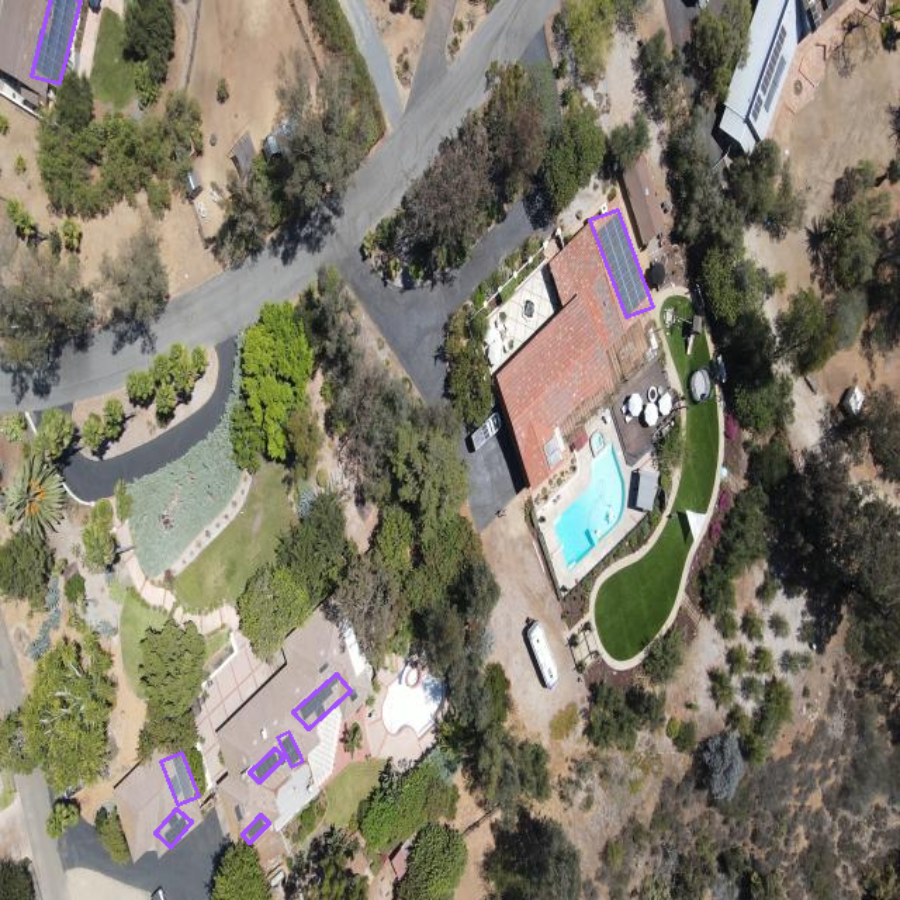

In [ ]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)
sv.cv2_to_pillow(annotated_frame)

Our model successfully identified the location of solar panels in the image. All solar panels have an oriented bounding box that fit the panel closely.

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.